Intercept: 106.68
Coefficients: Size = 0.14, Bedrooms = -21.03
R-squared: 0.60


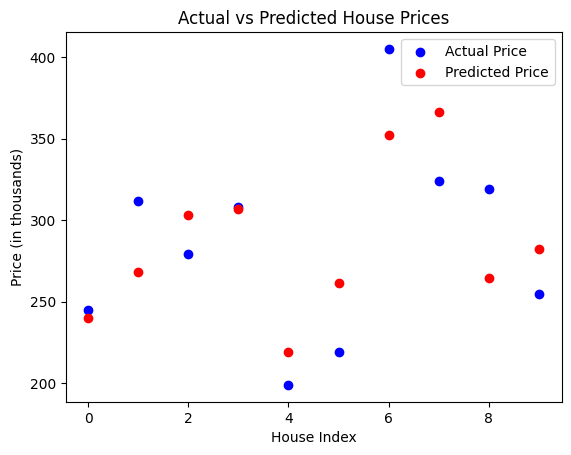

Predicted price for a 2000 sqft house with 3 bedrooms: $324.41 thousand


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Create a sample dataset for house prices
# np.array creates arrays for size (sqft), bedrooms, and price (in thousands)
data = {
    'Size': np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700]),
    'Bedrooms': np.array([3, 3, 2, 3, 2, 3, 4, 4, 2, 3]),
    'Price': np.array([245, 312, 279, 308, 199, 219, 405, 324, 319, 255])
}

# Convert dictionary to pandas DataFrame for easier manipulation
df = pd.DataFrame(data)

# Define independent variables (features) and dependent variable (target)
# X contains the predictors: Size and Bedrooms
X = df[['Size', 'Bedrooms']]
# y contains the target variable: Price
y = df['Price']

# Initialize the multiple linear regression model
model = LinearRegression()

# Fit the model to the data
# This step estimates the coefficients (beta_0, beta_1, beta_2) using least squares
model.fit(X, y)

# Predict house prices using the fitted model
y_pred = model.predict(X)

# Calculate R-squared to evaluate model performance
# R-squared measures how much variance in y is explained by the model
r2 = r2_score(y, y_pred)

# Print the intercept and coefficients
# Intercept (beta_0) is the base price when Size and Bedrooms are 0
# Coefficients (beta_1, beta_2) show the change in Price per unit change in Size and Bedrooms
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: Size = {model.coef_[0]:.2f}, Bedrooms = {model.coef_[1]:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize actual vs predicted prices
# Scatter plot for actual prices
plt.scatter(range(len(y)), y, color='blue', label='Actual Price')
# Scatter plot for predicted prices
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Price')
# Add labels and title
plt.xlabel('House Index')
plt.ylabel('Price (in thousands)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
# Display the plot
plt.show()

# Example prediction for a new house
# Predict price for a house with 2000 sqft and 3 bedrooms
new_house = np.array([[2000, 3]])
predicted_price = model.predict(new_house)
print(f"Predicted price for a 2000 sqft house with 3 bedrooms: ${predicted_price[0]:.2f} thousand")

*** Multiple linear regression ***

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error ,mean_squared_error

In [3]:
url = "https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv"
df = pd.read_csv(url)

In [ ]:
x = df.drop(['MEDV'],axis=1)
y = df['MEDV']


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [9]:
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

In [10]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = model.predict(x_test)

In [19]:
# r2 , mean absolute error , mean square error

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.6687594935356316
Mean Absolute Error: 3.1890919658878487
Mean Squared Error: 24.291119474973545


In [23]:
# predicted price vs actual price
sample = x_test.head(5)
predicted_price = model.predict(sample)

In [25]:
print("actual price", y_test.head(5))
print("predicted price " , predicted_price)

actual price 173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64
predicted price  [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]
